<img src="https://gcs-international.com/wp-content/uploads/2018/07/Unibe-Logo.png"  width="450" height="400">

# PR2 - Análisis de Datos Reales
## **Ejercicio y Aptitud Física en las personas**
<br>

### **Miembros del Grupo:**
##### Miguel Tapia (22-0357)
##### Marco Holguín-Veras (22-0367)
<br>

### **Prof.: Delio Alexander Siret Baéz**
<br>

### **Fecha de entrega:** 17/8/2023

# Paso 2: Descripción y Análisis del Problema
Base de Datos: (https://www.kaggle.com/datasets/aakashjoshi123/exercise-and-fitness-metrics-dataset).

Contexto:
El problema se enmarca en el ámbito de la salud y el fitness, donde se busca determinar qué tipo de ejercicio es más efectivo para quemar calorías y cómo el clima puede influir en la cantidad de calorías quemadas durante una sesión de ejercicio. Esto es importante para ayudar a las personas a tomar decisiones informadas sobre sus rutinas de ejercicio y optimizar sus esfuerzos para alcanzar sus objetivos de pérdida de peso y salud en general.

Características principales:
El problema implica analizar una base de datos que contiene información sobre diferentes ejercicios realizados por individuos, incluyendo datos como el tipo de ejercicio, la duración, la intensidad, el clima en el momento del ejercicio y la cantidad de calorías quemadas. Las características clave incluyen:

1. Tipo de ejercicio: Cada registro contiene información sobre el tipo de ejercicio realizado, que puede ser correr, nadar, levantar pesas, yoga, etc.

2. Duración e intensidad: La duración en minutos y la intensidad del ejercicio son factores cruciales que afectan la cantidad de calorías quemadas. Una relación más larga y/o intensa generalmente resulta en una mayor quema de calorías.

3. Clima: La temperatura y las condiciones climáticas pueden tener un impacto en la cantidad de calorías quemadas durante el ejercicio. Por ejemplo, el cuerpo puede trabajar más para mantener la temperatura en climas fríos.

4. Calorías quemadas: Esta es la variable objetivo que se busca predecir. Representa la cantidad de calorías que un individuo ha quemado durante su sesión de ejercicio.

5. Peso Actual/Peso Ideal: El peso actual de una persona y el peso ideal que quieren alcanzar en libras.

6. Ritmo Cardiáco: Cuanto era el ritmo cardiáco del participante durante el ejercicio.

7. Edad y Sexo

Motivación/Justificación:
La motivación detrás de resolver este problema es proporcionar a las personas una guía basada en datos sobre qué tipo de ejercicio podría ser más efectivo para quemar calorías, y cómo factores externos como el clima podrían influir en sus esfuerzos de pérdida de peso. Esto permite a las personas tomar decisiones más informadas sobre su enfoque de ejercicios y ajustar su rutina en función de las condiciones ambientales.

Tipo de problema de aprendizaje automático:
Este problema se enmarca como un problema de regresión, ya que el objetivo es predecir una cantidad numérica (calorías quemadas) en función de varias variables de entrada (tipo de ejercicio, duración, intensidad, clima, etc.). El aprendizaje automático puede ser utilizado para crear un modelo que aprenda patrones a partir de los datos históricos y pueda hacer predicciones sobre la cantidad de calorías que una persona podría quemar en función de las variables dadas.

# Paso 3: Planeación de la Solución del Problema

Requisitos del Proyecto:
Conjunto de datos: Tener acceso y comprensión del conjunto de datos de métricas de ejercicio y fitness proporcionado en Kaggle (https://www.kaggle.com/datasets/aakashjoshi123/exercise-and-fitness-metrics-dataset).


Python: Tener conocimientos de programación en Python para la implementación del análisis de datos, creación de modelos y visualización.


Bibliotecas: Familiaridad con bibliotecas como pandas, numpy, scikit-learn y matplotlib para el procesamiento de datos, el desarrollo de modelos y la visualización.
Objetivos de la Solución:
Predecir la cantidad de calorías quemadas en función de las variables de entrada (tipo de ejercicio, duración, intensidad, clima, etc.).

Determinar cómo el clima afecta la cantidad de calorías quemadas.

Implementar un código para poder limpiar los datos y poder crear gráficos como el gráfico de flujos para poder llegar a una solución y determinar cuál es el mejor ejercicio o el ejercicio más óptimo para poder alcanzar tu peso ideal y ver cual seria la mejor situación.


 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
url = 'https://drive.google.com/uc?id=1dnvro-P6hLJQ07oWBjFWXdTv6KLTxzkk'
df_exercise = pd.read_csv(url)
df_exercise

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,3860,Exercise 5,154.113144,98.147291,96.745133,20,Female,22,139,32.447764,Cloudy,7
3860,3861,Exercise 4,486.392768,97.598957,92.700573,21,Female,49,160,26.602475,Rainy,5
3861,3862,Exercise 4,264.307731,94.946612,96.778936,57,Male,56,167,31.435348,Rainy,9
3862,3863,Exercise 9,185.951870,64.743906,68.662889,58,Female,60,128,19.774614,Rainy,1


In [21]:
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [22]:
df_exercise.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [27]:
df_exercise['Exercise'].value_counts()

Exercise 5     404
Exercise 1     403
Exercise 10    398
Exercise 8     397
Exercise 9     394
Exercise 7     386
Exercise 3     385
Exercise 6     381
Exercise 4     371
Exercise 2     345
Name: Exercise, dtype: int64

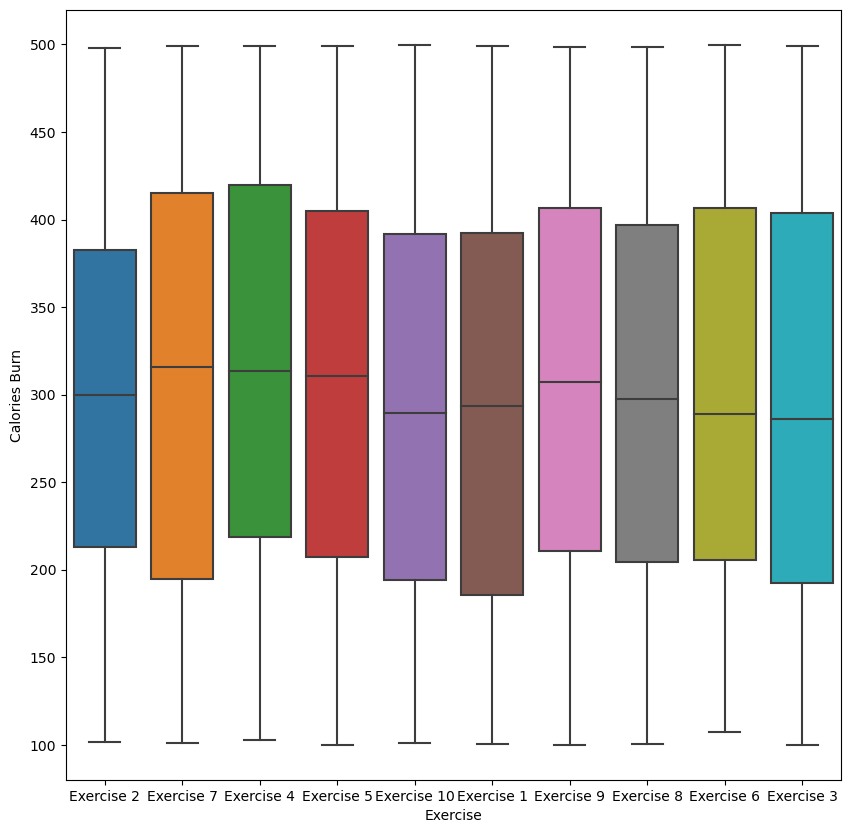

In [32]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x = 'Exercise', y = 'Calories Burn', data = df_exercise, ax = ax)
plt.show()